# Вариант №14.

In [119]:
variant = 14

<a id="0"></a>

# Импорты и определения

In [56]:
import numpy as np
from scipy import stats
import math as m
import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown  # для вывода 
from pathlib import Path


In [57]:
def printf(*strings):  # функция вывода маркдаун в консоль
    for s in strings:
        display(Markdown(s))

# можно выводить latex в надписях matplotlib
plt.rc("text", usetex=False)
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rc(
    "text.latex",
    preamble=r"""
\usepackage[english, russian]{babel}
\usepackage[utf8]{inputenc}
""",
)
plt.style.use("seaborn-v0_8")

def dataframe_to_markdown(df):
    if df.index.name is None:
        first_cell = "Index"
    elif df.columns.name is None:
        first_cell = df.index.name
    else:
        first_cell = df.index.name + "\\" + df.columns.name
    markdown_table = "| " + first_cell + " | " + " | ".join(df.columns) + " |\n"
    markdown_table += "|---" * (len(df.columns) + 1) + "|\n"  # Учитываем индекс

    for index, row in df.iterrows():
        row_values = [str(round(val, 2) if type(val) != str else val) for val in row]
        markdown_table += f"| {index} | " + " | ".join(row_values) + " |\n"

    return markdown_table




In [58]:
%pwd

'd:\\помощь\\.vscode'

In [59]:
path_to_vars = Path("C:/Users/79165/Downloads/gfggf/var_matstat_K5.xls")
path_to_data = Path("C:/Users/79165/Downloads/gfggf/data_matstat_K5.xls")


In [60]:
# считываем столбики для варианта
datas = pd.read_excel(path_to_vars, index_col=0).loc[variant]

datas.head()

1.1         B16 B17 B18
1.2                 B16
2.1, 3.1            B16
2.2, 3.2            B16
2.3, 3.3        B16 B17
Name: 14, dtype: object

In [79]:

variant_dict = dict()
for tasks in datas.index:
    for task in tasks.split(", "):
        variant_dict[task] = (
            datas[tasks]
            .replace("А", "A")
            .replace("В", "B")
            .replace("С", "C")
            .split(" ")
        )

print(variant_dict)

{'1.1': ['B16', 'B17', 'B18'], '1.2': ['B16'], '2.1': ['B16'], '3.1': ['B16'], '2.2': ['B16'], '3.2': ['B16'], '2.3': ['B16', 'B17'], '3.3': ['B16', 'B17'], '2.4': ['B16', 'B17'], '3.4': ['B16', 'B17'], '4': ['B16'], '5': ['B16', 'B17'], '6': ['B3', 'B5'], '7': ['B3', 'B16'], '8.1': ['B16', 'B17'], '8.2': ['B16', 'B17', 'B18'], '9.1': ['B16', 'B2'], '9.2': ['B16', 'B2'], '9.3': ['B16', 'B7', 'B2']}


### Считываем информацию из excel

In [62]:
dfs = pd.read_excel(path_to_data, sheet_name=None)
dfs.keys()

dict_keys(['description', 'A - aaup', 'B - bodyfat', 'C - plasma', 'D - homedat'])

In [63]:
# создаём словарик: буква -> название листа в excel
sheet_dict = dict()
for value in list(dfs.keys())[1:]:
    key = value[0]
    sheet_dict[key] = value
print(sheet_dict)

{'A': 'A - aaup', 'B': 'B - bodyfat', 'C': 'C - plasma', 'D': 'D - homedat'}


In [64]:
# функция: задание -> необходимые данные
def data(task):
    X = []
    for data in variant_dict[task]:
        sheet = data[0]
        column = data
        df = dfs[sheet_dict[sheet]][column]
        X.append(df)
    return X

### Дополнительные функции

In [65]:
def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

<a id="1"></a>

# Раздел 1. Описательные статистики

<a id="11"></a>

## 1.1 Выборочные характеристики

### Условие

Анализируемый признак 1 – `B16` 

Анализируемый признак 2 – `B17` 

Анализируемый признак 3 – `B18` 

In [80]:
columns = data("1.1")
for i in columns:
    print(i.head())

0    32.0
1    30.5
2    28.8
3    32.4
4    32.2
Name: B16, dtype: float64
0    27.4
1    28.9
2    25.2
3    29.4
4    27.7
Name: B17, dtype: float64
0    17.1
1    18.2
2    16.6
3    18.2
4    17.7
Name: B18, dtype: float64


### Привести формулы расчёта выборочных характеристик

| Выборочная характеристика                | Формула расчёта                                                                                                                                                                                                                                 |
| ---------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Объём выборки                            | $n$                                                                                                                                                                                                                                             |
| Среднее                                  | $\overline x = \dfrac{1}{n} \sum\limits_{i = 1}^{n} x_i$                                                                                                                                                                                        |
| Выборочная дисперсия                     | $D_X^* = \dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2$                                                                                                                                                                 |
| Выборочное среднеквадратичное отклонение | $\sigma_X^* = \sqrt{D_X^*} =\sqrt{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2}$                                                                                                                                       |
| Выборочный коэффициент асимметрии        | $\gamma_X^* = \dfrac{\mu_{3,X}^*}{\left(\sigma_X^*\right)^3} = \dfrac{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^3}{\left(\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2\right)^{\frac{3}{2}}}$ |
| Выборочный эксцесс                       |      $\varepsilon_X^* = \dfrac{\mu_{4,X}^*}{\left(\sigma_X^*\right)^4} - 3 = \dfrac{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^4}{\left(\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2\right)^2} - 3$                                                                                                                                                                                                                                           |


### Рассчет выборочных характеристик

`pd.skew()` возвращает несмещенный выборочный коэффициент асимметрии

`kurtosis()` экцесса


In [82]:
for i, X in enumerate(columns, start=1):
    mean_ = X.mean()
    D = X.var(ddof=0)
    d = X.std(ddof=0)
    g = stats.skew(X, bias=True)
    e = stats.kurtosis(X, bias=True)
    output = f"$\\mathbf{{X_{i}}}:$ \
        $\\overline x_{i} =$ {mean_:.2f}; \
        $D^*_{{X_{i}}} =$ {D:.2f}; \
        $\\sigma^*_{{X_{i}}} =$ {d:.2f}; \
        $\\gamma^*_{{X_{i}}} =$ {g:.2f}; \
        $\\varepsilon^*_{{X_{i}}} =$ {e:.2f} \
        "
    printf(output)

$\mathbf{X_1}:$         $\overline x_1 =$ 32.27;         $D^*_{X_1} =$ 9.09;         $\sigma^*_{X_1} =$ 3.02;         $\gamma^*_{X_1} =$ 0.28;         $\varepsilon^*_{X_1} =$ 0.46         

$\mathbf{X_2}:$         $\overline x_2 =$ 28.66;         $D^*_{X_2} =$ 4.07;         $\sigma^*_{X_2} =$ 2.02;         $\gamma^*_{X_2} =$ -0.22;         $\varepsilon^*_{X_2} =$ 0.83         

$\mathbf{X_3}:$         $\overline x_3 =$ 18.23;         $D^*_{X_3} =$ 0.87;         $\sigma^*_{X_3} =$ 0.93;         $\gamma^*_{X_3} =$ 0.28;         $\varepsilon^*_{X_3} =$ 0.36         

| Выборочная характеристика                | Признак 1 | Признак 2 | Признак 3 |
| ---------------------------------------- | --------- | --------- | --------- |
| Среднее                                  | 32.27    | 28.66   | 18.23     |
| Выборочная дисперсия                     | 9.09     | 4.07    | 0.87      |
| Выборочное среднеквадратичное отклонение | 3.02     | 2.02    | 0.93      |
| Выборочный коэффициент асимметрии        | 0.28     | -0.22   | 0.28      |
| Выборочный эксцесс                       | 0.46     |  0.83   | 0.36      |


<a id="12"></a>

## 1.2 Группировка и гистограммы частот

### Условие

Анализируемый признак – `B16` 

Объём выборки – $n$ = `252`

### Определения

In [83]:
X = data("1.2")[0]
X

0      32.0
1      30.5
2      28.8
3      32.4
4      32.2
       ... 
247    25.6
248    35.2
249    31.3
250    30.5
251    33.7
Name: B16, Length: 252, dtype: float64

In [84]:
print(n := len(X))

252


In [85]:
X = pd.DataFrame(X.values, columns=["value"])
X.head()

,value
0,32.0
1,30.5
2,28.8
3,32.4
4,32.2


### Выбрать число групп

In [88]:
maximum = max(X["value"])
minimum = min(X["value"])
k = round(1 + 1.3 * m.log(n))
printf(f"$\\mathbf{{X}}: \\max = {maximum}, \\min = {minimum}, n = {n}, k = {k}$")

$\mathbf{X}: \max = 45.0, \min = 24.8, n = 252, k = 8$

In [89]:
X["group"] = pd.cut(X["value"], bins=k)
X.head()

,value,group
0,32.0,"(29.85, 32.375]"
1,30.5,"(29.85, 32.375]"
2,28.8,"(27.325, 29.85]"
3,32.4,"(32.375, 34.9]"
4,32.2,"(29.85, 32.375]"


In [90]:
delta_min = np.min(
    [interval.right - interval.left for interval in X["group"].cat.categories]
)
delta_max = np.max(
    [interval.right - interval.left for interval in X["group"].cat.categories]
)
printf(f"Ширина интервалов: от {delta_min:.2f} до {delta_max:.2f}")

Ширина интервалов: от 2.52 до 2.54

| Число групп | Обоснование выбора числа групп                 | Ширина интервалов |
| ----------- | ---------------------------------------------- | ----------------- |
| 8           | Формула Стерджесса: $k \approx 1 + 1,3 \ln{n}$ | от 2.52 до 2.54   |


### Построить таблицу частот

In [91]:
groups = pd.DataFrame(index=pd.Index(range(1, k + 1), name="Номер интервала"))
groups["low edge"] = [interval.left for interval in X["group"].cat.categories]
groups["high edge"] = [interval.right for interval in X["group"].cat.categories]
groups["frequency"] = X["group"].value_counts().sort_index().values
groups["relative frequency"] = groups["frequency"] / n
groups["cumulative frequency"] = groups["frequency"].cumsum()
groups["cumulative relative frequency"] = groups["cumulative frequency"] / n
groups

,low edge,high edge,frequency,relative frequency,cumulative frequency,cumulative relative frequency
Номер интервала,,,,,,
1,24.780,27.325,11,0.043651,11,0.043651
2,27.325,29.850,41,0.162698,52,0.206349
3,29.850,32.375,81,0.321429,133,0.527778
4,32.375,34.900,66,0.261905,199,0.789683
5,34.900,37.425,44,0.174603,243,0.964286
6,37.425,39.950,8,0.031746,251,0.996032
7,39.950,42.475,0,0.000000,251,0.996032
8,42.475,45.000,1,0.003968,252,1.000000


In [94]:

print(dataframe_to_markdown(groups))

| Номер интервала | low edge | high edge | frequency | relative frequency | cumulative frequency | cumulative relative frequency |
|---|---|---|---|---|---|---|
| 1 | 24.78 | 27.32 | 11.0 | 0.04 | 11.0 | 0.04 |
| 2 | 27.32 | 29.85 | 41.0 | 0.16 | 52.0 | 0.21 |
| 3 | 29.85 | 32.38 | 81.0 | 0.32 | 133.0 | 0.53 |
| 4 | 32.38 | 34.9 | 66.0 | 0.26 | 199.0 | 0.79 |
| 5 | 34.9 | 37.42 | 44.0 | 0.17 | 243.0 | 0.96 |
| 6 | 37.42 | 39.95 | 8.0 | 0.03 | 251.0 | 1.0 |
| 7 | 39.95 | 42.48 | 0.0 | 0.0 | 251.0 | 1.0 |
| 8 | 42.48 | 45.0 | 1.0 | 0.0 | 252.0 | 1.0 |



| Номер интервала | Нижняя граница | Верхняя граница | Частота | Относительная частота | Накопленная частота | Относительная накопленная частота |
| --------------- | -------------- | --------------- | ------- | --------------------- | ------------------- | --------------------------------- |
| 1               | 24.78        | 27.32          | 11.0      | 0.04                  | 11.0                | 0.04                             |
| 2               | 27.32        | 29.85        | 41.0     | 0.16               | 52.0                | 0.21                              |
| 3               | 29.85         | 32.38          | 81.0      | 0.32                   | 133.0                 | 0.52                              |
| 4               | 32.38         | 34.9          | 66.0      | 0.26                  | 199.0                 | 0.79                              |
| 5               | 34.9         | 37.42          | 44.0       | 0.17                  | 243.0                 | 0.96                              |
| 6               | 37.42         | 39.95          | 8.0       | 0.03                   | 251.0                 | 1.0                              |
| 7               | 39.95         | 42.48          | 0.0       | 0.0                   | 251.0                 | 1.00                              |
| 8               | 42.48         | 45.0          | 1.0       | 0.0                   | 252.0                 | 1.00                              |

### Построим гистограммы частот и полигоны частот

In [95]:
bin_centers = (groups["low edge"] + groups["high edge"]) / 2
width = groups["high edge"] - groups["low edge"]

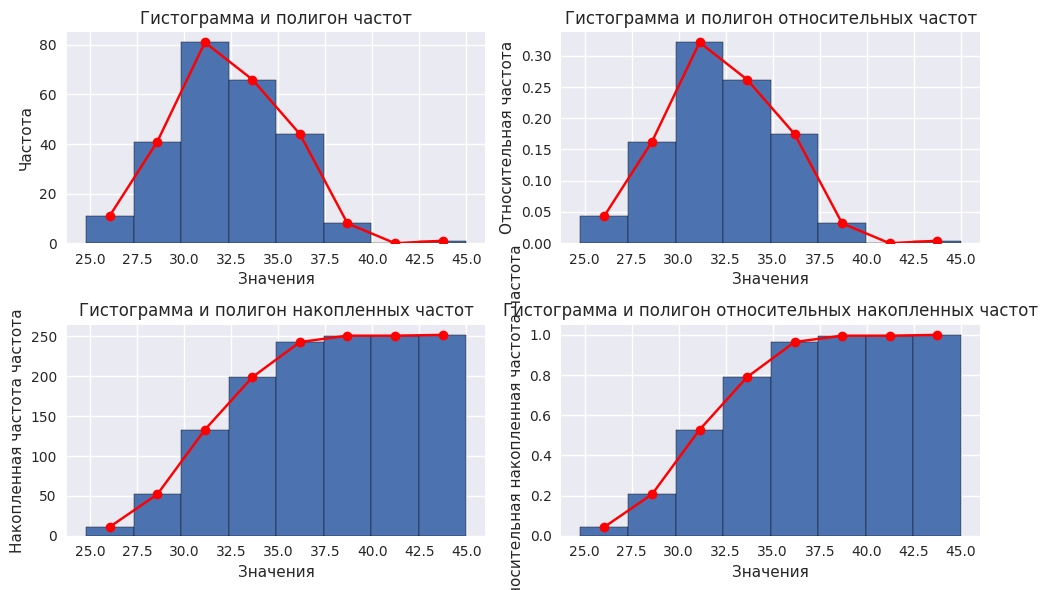

In [98]:
plt.rcParams.update({"text.usetex": False})
plt.rcParams["font.family"] = "DejaVu Sans"

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0, 0].bar(
    bin_centers,
    groups["frequency"],
    width=width,
    edgecolor="black",
)
axes[0, 0].plot(bin_centers, groups["frequency"], marker="o", color="r")
axes[0, 0].set_xlabel("Значения")
axes[0, 0].set_ylabel("Частота")
axes[0, 0].set_title("Гистограмма и полигон частот")

axes[0, 1].bar(
    bin_centers,
    groups["relative frequency"],
    width=width,
    edgecolor="black",
)
axes[0, 1].plot(bin_centers, groups["relative frequency"], marker="o", color="r")
axes[0, 1].set_xlabel("Значения")
axes[0, 1].set_ylabel("Относительная частота")
axes[0, 1].set_title("Гистограмма и полигон относительных частот")

axes[1, 0].bar(
    bin_centers,
    groups["cumulative frequency"],
    width=width,
    edgecolor="black",
)
axes[1, 0].plot(bin_centers, groups["cumulative frequency"], marker="o", color="r")
axes[1, 0].set_xlabel("Значения")
axes[1, 0].set_ylabel("Накопленная частота частота")
axes[1, 0].set_title("Гистограмма и полигон накопленных частот")

axes[1, 1].bar(
    bin_centers,
    groups["cumulative relative frequency"],
    width=width,
    edgecolor="black",
)
axes[1, 1].plot(
    bin_centers, groups["cumulative relative frequency"], marker="o", color="r"
)
axes[1, 1].set_xlabel("Значения")
axes[1, 1].set_ylabel("Относительная накопленная частота частота")
axes[1, 1].set_title("Гистограмма и полигон относительных накопленных частот")

plt.tight_layout()
plt.show()

### Построить эмпирическую фукнцию распределения

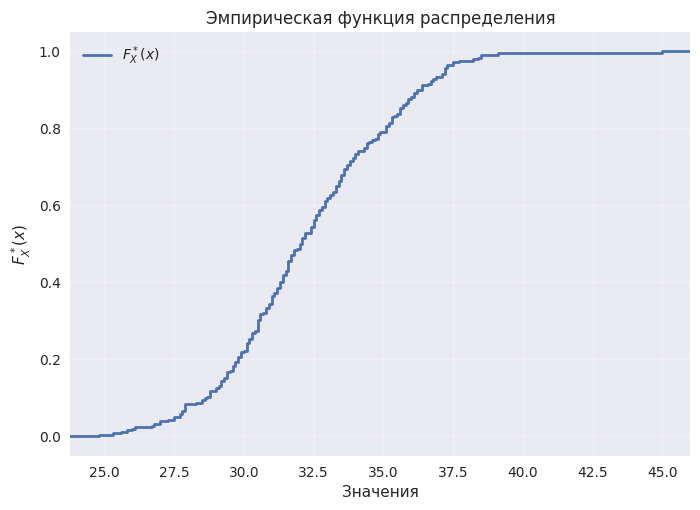

In [118]:


X_sorted = np.sort(np.asarray(X))
n = X_sorted.size

# небольшие отступы слева/справа, чтобы ступеньки не упирались в края
spread = X_sorted[-1] - X_sorted[0]
pad = 0.05 * spread if spread > 0 else 1.0

x_step = np.concatenate((
    [X_sorted[0] - pad],
    X_sorted,
    [X_sorted[-1] + pad],
))
F = np.concatenate((
    [0],
    np.arange(1, n + 1) / n,
    [1],
))

plt.step(x_step, F, where="post", label=r"$F_X^*(x)$", linewidth=2)
plt.xlim(x_step[0], x_step[-1])
plt.ylim(-0.05, 1.05)
plt.xlabel("Значения")
plt.ylabel(r"$F_X^*(x)$")
plt.title("Эмпирическая функция распределения")
plt.legend()
plt.grid(alpha=0.25)
plt.show()




<a id="2"></a>

# Раздел 2. Интервальные оценки

<a id="21"></a>

## 2.1 Доверительные интервалы для математического ожидания

### Условие

Анализируемый признак – `B16` (Weight (lbs))

Объём выборки – $n$ = `252`

Оцениваемый параметр – `m`

### Определения

In [101]:
X = data("2.1")[0]
X.head()

0    32.0
1    30.5
2    28.8
3    32.4
4    32.2
Name: B16, dtype: float64

In [102]:
print(n := len(X))

252


### Привести формулы расчёта доверительных интервалов

Так как у нас есть только выборка, мы не можем знать параметров генеральной совокупности(в том числе $m$ и $\sigma$), поэтому будем рассчитывать доверительные интервалы, используя данный факт. 

В данном случае `стьюдентизованное среднее` выступает в качестве центральной статистики:

| Граница доверительного интервала | Формула расчёта                                                                               |
| -------------------------------- | --------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\overline {\mathbf{X}} - \dfrac{S}{\sqrt{n}} \cdot t_{1-\frac{\alpha}{2}, \left(n-1\right)}$ |
| Верхняя граница                  | $\overline {\mathbf{X}} + \dfrac{S}{\sqrt{n}} \cdot t_{1-\frac{\alpha}{2}, \left(n-1\right)}$ |


### Рассчет доверительных интервалов

In [103]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
std_err = stats.sem(X)
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.t.interval(
        1 - alpha, df=n - 1, loc=X.mean(), scale=std_err
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,31.779420,31.898580,31.959201
Верхняя граница,32.767405,32.648245,32.587625


In [104]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 31.78 | 31.9 | 31.96 |
| Верхняя граница | 32.77 | 32.65 | 32.59 |



| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| -------------------------------- | --------------- | --------------- | -------------- |
| Нижняя граница                   | 31.78          | 31.9         | 31.96         |
| Верхняя граница                  | 32.77         | 32.65         | 32.59        |

<a id="22"></a>

## 2.2 Доверительные интервалы для дисперсии

### Условие

Анализируемый признак  – `B16` (Weight (lbs))

Объём выборки – $n$ = `252`

Оцениваемый параметр – $\sigma^2$

### Определения

In [105]:
X = data("2.2")[0]
X.head()

0    32.0
1    30.5
2    28.8
3    32.4
4    32.2
Name: B16, dtype: float64

In [106]:
print(n := len(X))

252


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                                               |
| -------------------------------- | --------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\dfrac{\left(n-1\right) \cdot S^2}{\chi^2_{1-\frac{\alpha}{2}, \left(n-1\right)}}$ |
| Верхняя граница                  | $\dfrac{\left(n-1\right) \cdot S^2}{\chi^2_{\frac{\alpha}{2}, \left(n-1\right)}}$ |


### Рассчет доверительных интервалов

In [108]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    chi2_upper, chi2_lower = stats.chi2.interval(1 - alpha, df=n - 1)
    intervals[f"$\\alpha =$ {alpha}"] = [
        (n - 1) * X.var(ddof=1) / chi2_lower,
        (n - 1) * X.var(ddof=1) / chi2_upper,
    ]
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,7.332595,7.720132,7.929094
Верхняя граница,11.627525,10.961915,10.640781


In [109]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 7.33 | 7.72 | 7.93 |
| Верхняя граница | 11.63 | 10.96 | 10.64 |



| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| -------------------------------- | --------------- | --------------- | -------------- |
| Нижняя граница                   | 7.33            | 7.72            | 7.93           |
| Верхняя граница                  | 11.63           | 10.96           | 10.64          |

<a id="23"></a>

## 2.3 Доверительные интервалы для разности мат. ожиданий

### Условие

Анализируемый признак 1 – `B16` 
Анализируемый признак 2 – `B17` 

Объёмы выборок – $n_1 = n_2 = 252$

Оцениваемый параметр – $m_1 - m_2$

### Определения

In [110]:
X1, X2 = data("2.3")
X1.head(), X2.head()

(0    32.0
 1    30.5
 2    28.8
 3    32.4
 4    32.2
 Name: B16, dtype: float64,
 0    27.4
 1    28.9
 2    25.2
 3    29.4
 4    27.7
 Name: B17, dtype: float64)

In [111]:
print(n1 := len(X1), n2 := len(X2))

252 252


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                                                                                                                 |
| -------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\left(\overline{\mathbf{X_1}} - \overline{\mathbf{X_2}}\right) - t_{1-\frac{\alpha}{2}, (n_1 + n_2 -2)} \cdot S \cdot \sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}} $ |
| Верхняя граница                  | $\left(\overline{\mathbf{X_1}} - \overline{\mathbf{X_2}}\right) + t_{1-\frac{\alpha}{2}, (n_1 + n_2 -2)} \cdot S \cdot \sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}} $ |
| $S$                              | $\sqrt{\dfrac{(n_1 - 1)S_1^2 + (n_2-1) S_2^2}{n_1 + n_2 -2}}  $                                                                                                 |


### Рассчет доверительных интервалов

In [112]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
std_err = m.sqrt(
    ((n1 - 1) * X1.var(ddof=1) + (n2 - 1) * X2.var(ddof=1))
    / (n1 + n2 - 2)
    * (1 / n1 + 1 / n2)
)
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.t.interval(
        1 - alpha, df=n1 + n2 - 2, loc=X1.mean() - X2.mean(), scale=std_err
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,3.017494,3.159673,3.232211
Верхняя граница,4.201553,4.059375,3.986837


In [113]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 3.02 | 3.16 | 3.23 |
| Верхняя граница | 4.2 | 4.06 | 3.99 |



| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| -------------------------------- | --------------- | --------------- | -------------- |
| Нижняя граница                   | 3.02            | 3.16            | 3.23           |
| Верхняя граница                  | 4.2             | 4.06            | 3.99           |

<a id="24"></a>

## 2.4. Доверительные интервалы для отношения дисперсий

### Условие

Анализируемый признак 1 – `B11` (Abdomen circumference (cm))

Анализируемый признак 2 – `B12` (Hip circumference (cm))

Объёмы выборок – $n_1 = n_2 = 252$

Оцениваемый параметр – $\dfrac{\sigma_1^2}{\sigma_2^2}$


### Определения

In [114]:
X1, X2 = data("2.4")
X1.head(), X2.head()

(0    32.0
 1    30.5
 2    28.8
 3    32.4
 4    32.2
 Name: B16, dtype: float64,
 0    27.4
 1    28.9
 2    25.2
 3    29.4
 4    27.7
 Name: B17, dtype: float64)

In [115]:
print(n1 := len(X1), n2 := len(X2))

252 252


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                       |
| -------------------------------- | --------------------------------------------------------------------- |
| Нижняя граница                   | $\dfrac{S_1^2}{S_2^2} \cdot F_{\frac{\alpha}{2}, (n_1-1, n_2-1)}$     |
| Верхняя граница                  | $\dfrac{S_1^2}{S_2^2} \cdot F_{1 - \frac{\alpha}{2}, (n_1-1, n_2-1)}$ |

### Рассчитать доверительные интервалы

In [116]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.f.interval(
        1 - alpha, dfn=n1 - 1, dfd=n2 - 1, loc=0, scale=X1.var(ddof=1) / X2.var(ddof=1)
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,1.613274,1.744541,1.815643
Верхняя граница,3.097793,2.864702,2.752518


In [117]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 1.61 | 1.74 | 1.82 |
| Верхняя граница | 3.1 | 2.86 | 2.75 |



| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| -------------------------------- | --------------- | --------------- | -------------- |
| Нижняя граница                   | 1.61            | 1.74            | 1.82           |
| Верхняя граница                  | 3.1            | 2.86             | 2.75           |

<a id="3"></a>